In [2]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#importing dataset 1

dataset_1 = pd.read_csv('/content/drive/MyDrive/Machine Learning Works/Correlational Work/climate_change.csv')

df1 = pd.DataFrame(dataset_1)
df1.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [6]:
#importing dataset 2

dataset_2 = pd.read_csv('/content/drive/MyDrive/Machine Learning Works/Correlational Work/heart_failure_clinical_records_dataset.csv')

df2 = pd.DataFrame(dataset_2)
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
#Performing Concatenation

con_df = pd.concat([df1, df2], axis=1)

con_df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,...,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,...,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,...,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,...,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,...,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,...,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0


In [8]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      308 non-null    int64  
 1   Month                     308 non-null    int64  
 2   MEI                       308 non-null    float64
 3   CO2                       308 non-null    float64
 4   CH4                       308 non-null    float64
 5   N2O                       308 non-null    float64
 6   CFC-11                    308 non-null    float64
 7   CFC-12                    308 non-null    float64
 8   TSI                       308 non-null    float64
 9   Aerosols                  308 non-null    float64
 10  Temp                      308 non-null    float64
 11  age                       299 non-null    float64
 12  anaemia                   299 non-null    float64
 13  creatinine_phosphokinase  299 non-null    float64
 14  diabetes  

In [9]:
con_df.shape

(308, 24)

In [10]:
con_df.isnull().any()

Year                        False
Month                       False
MEI                         False
CO2                         False
CH4                         False
N2O                         False
CFC-11                      False
CFC-12                      False
TSI                         False
Aerosols                    False
Temp                        False
age                          True
anaemia                      True
creatinine_phosphokinase     True
diabetes                     True
ejection_fraction            True
high_blood_pressure          True
platelets                    True
serum_creatinine             True
serum_sodium                 True
sex                          True
smoking                      True
time                         True
DEATH_EVENT                  True
dtype: bool

In [11]:
con_df.isnull().sum()

Year                        0
Month                       0
MEI                         0
CO2                         0
CH4                         0
N2O                         0
CFC-11                      0
CFC-12                      0
TSI                         0
Aerosols                    0
Temp                        0
age                         9
anaemia                     9
creatinine_phosphokinase    9
diabetes                    9
ejection_fraction           9
high_blood_pressure         9
platelets                   9
serum_creatinine            9
serum_sodium                9
sex                         9
smoking                     9
time                        9
DEATH_EVENT                 9
dtype: int64

In [12]:
dataframe = con_df.dropna(how='any')
dataframe

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,...,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,...,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,...,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,...,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,...,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,...,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2007,11,-1.177,382.42,1803.79,321.062,246.178,537.319,1365.6680,0.0042,...,1.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0,0.0
295,2007,12,-1.168,383.89,1805.58,321.217,246.261,537.052,1365.6927,0.0040,...,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0,0.0
296,2008,1,-1.011,385.44,1809.92,321.328,246.183,536.876,1365.7163,0.0038,...,1.0,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0,0.0
297,2008,2,-1.402,385.73,1803.45,321.345,245.898,536.484,1365.7366,0.0036,...,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0,0.0


In [13]:
dataframe.isnull().sum().sum()

0

In [14]:
if dataframe.select_dtypes(include=['object']).columns.any(): print("true")
else: print("False")

False


In [15]:
#Feature Scaling

dataframe2 = dataframe.copy()

from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()

X = standardscaler.fit_transform(dataframe2)
X

array([[-1.70677496, -0.43660043,  2.40333401, ..., -0.68768191,
        -1.62950241,  1.4541607 ],
       [-1.70677496, -0.14714693,  1.98935097, ..., -0.68768191,
        -1.60369074,  1.4541607 ],
       [-1.70677496,  0.14230657,  1.53599165, ...,  1.4541607 ,
        -1.5907849 ,  1.4541607 ],
       ...,
       [ 1.76482853, -1.59441442, -1.39275212, ..., -0.68768191,
         1.90669738, -0.68768191],
       [ 1.76482853, -1.30496092, -1.8088636 , ...,  1.4541607 ,
         1.93250906, -0.68768191],
       [ 1.76482853, -1.01550742, -2.05682774, ...,  1.4541607 ,
         1.99703825, -0.68768191]])

In [16]:
#implementing PCA
from sklearn.decomposition import PCA
pca = PCA(0.95)

X_pca = pca.fit_transform(X)
X_pca.shape

(299, 16)

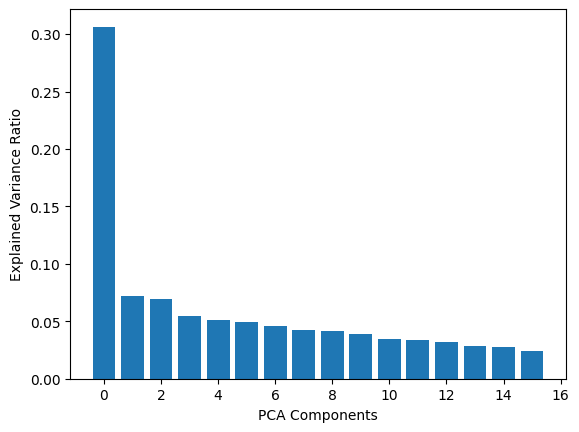

In [17]:
variance_ratio = pca.explained_variance_ratio_


plt.bar(range(len(variance_ratio)), variance_ratio)
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [18]:
pca.components_

array([[-3.57671136e-01,  2.03585251e-02,  3.25702763e-02,
        -3.49780956e-01, -3.52272099e-01, -3.53040889e-01,
        -2.40084628e-01, -3.47851191e-01, -6.77658839e-02,
         1.34595812e-01, -2.92297866e-01,  1.04967514e-01,
         5.48043953e-02,  5.00743075e-03, -1.21704548e-02,
        -3.43745849e-02,  7.33682337e-02, -7.51972145e-03,
         8.39732909e-02, -5.31581848e-02,  9.36819737e-03,
         1.01956528e-02, -3.54316174e-01,  2.37283702e-01],
       [-6.29378622e-02, -2.03176179e-01,  1.11043022e-01,
        -6.39046911e-02,  1.27825411e-02, -7.31125352e-02,
         1.82784336e-01,  4.98883233e-02,  9.46342038e-02,
         1.75179967e-01, -7.88967877e-02, -4.25767681e-02,
         2.08604243e-01, -1.04183122e-01,  1.28856651e-01,
         3.65795593e-01,  2.16795615e-01,  2.32284516e-01,
        -1.35712507e-01,  2.47130337e-01, -5.01803061e-01,
        -4.04675876e-01, -8.57161099e-02, -2.02758019e-01],
       [-8.10536625e-02,  3.90569743e-02,  3.98315875e

In [19]:
component_names = [dataframe.columns[i] for i in np.argmax(np.abs(pca.components_), axis=1)]

component_names


['Year',
 'sex',
 'Aerosols',
 'creatinine_phosphokinase',
 'serum_sodium',
 'TSI',
 'Month',
 'platelets',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'diabetes',
 'serum_creatinine',
 'serum_sodium',
 'Temp',
 'Aerosols']

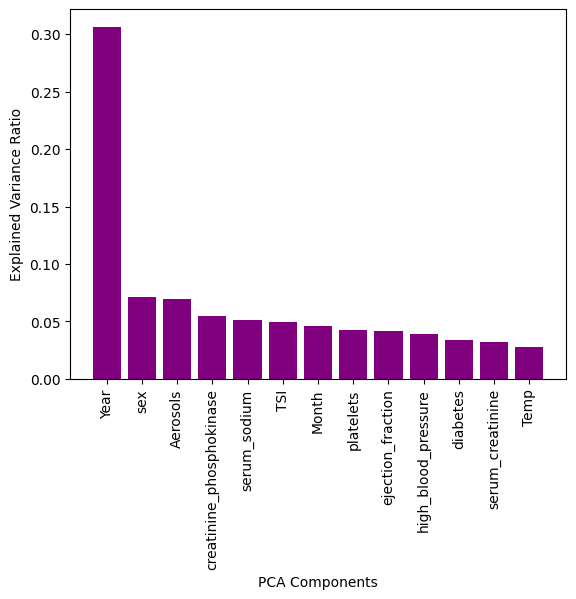

In [20]:
variance_ratio = pca.explained_variance_ratio_


plt.bar(component_names, variance_ratio, color='purple')
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(rotation=90)
plt.show()

In [21]:
component_names

['Year',
 'sex',
 'Aerosols',
 'creatinine_phosphokinase',
 'serum_sodium',
 'TSI',
 'Month',
 'platelets',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'diabetes',
 'serum_creatinine',
 'serum_sodium',
 'Temp',
 'Aerosols']

<ipython-input-22-ee5ede75875c>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(1, len(variance_ratio) + 1), cumulative_variance_ratio, 'bo-', linewidth=0.2, color='orange')


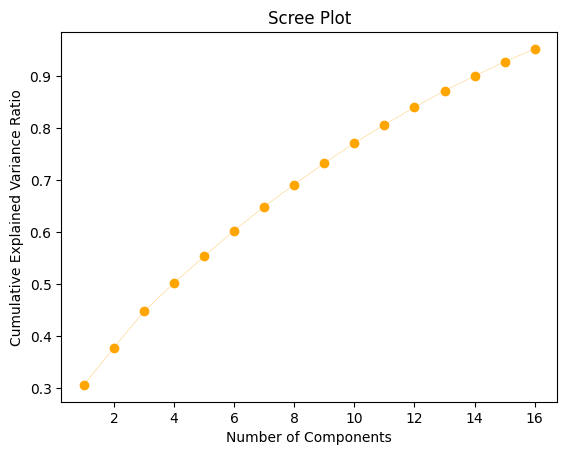

In [22]:
cumulative_variance_ratio = np.cumsum(variance_ratio)

# plot the Scree plot
plt.plot(range(1, len(variance_ratio) + 1), cumulative_variance_ratio, 'bo-', linewidth=0.2, color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


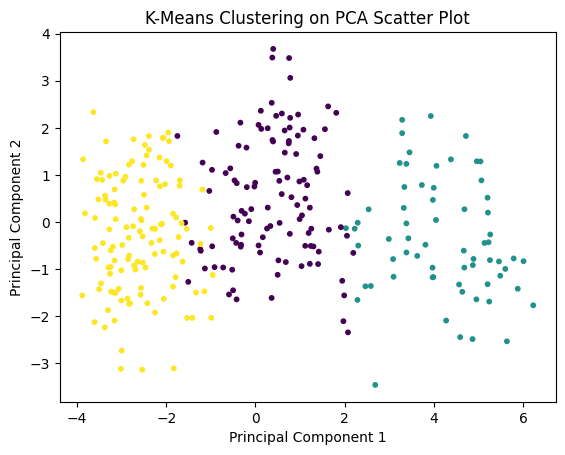

In [23]:
from sklearn.cluster import KMeans

# assuming you already have X and y as your data and labels, and you have performed PCA on X

# set the number of clusters
n_clusters = 3

# perform k-means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(X_pca)

# create a scatter plot of the two components, colored by the cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=10)

# set axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA Scatter Plot')

plt.show()

In [29]:
dataframe_after_pca = pd.DataFrame(X_pca, columns=component_names)
dataframe_after_pca

,Year,sex,Aerosols,creatinine_phosphokinase,serum_sodium,TSI,Month,platelets,ejection_fraction,high_blood_pressure,platelets,diabetes,serum_creatinine,serum_sodium,Temp,Aerosols
0,6.011157,-0.833298,0.712545,-0.208505,1.850463,1.079971,1.270196,-0.025120,-1.285818,1.407077,-0.822171,-0.278710,-1.795596,0.446861,-1.237891,1.711810
1,5.488818,-1.143314,2.466822,4.415530,2.318932,2.734419,1.024824,-3.972163,0.225496,-0.188020,1.500398,-0.531452,0.722325,3.137375,-1.166054,0.932562
2,5.638552,-2.536056,1.052559,-0.029085,1.233254,0.158793,0.260572,0.432633,-1.084529,-0.609743,-0.811876,-0.372296,-1.901319,0.152088,-1.297392,0.973770
3,5.460277,-0.839624,0.270835,-0.332683,1.241638,0.093925,-0.512081,-0.381537,-2.077837,-1.505397,0.637687,0.697131,-0.388988,-0.232964,-1.678710,1.613107
4,5.790072,-0.775249,-2.561301,-0.013767,3.755631,-0.827553,0.500480,2.143991,-0.301673,-0.809126,-0.161406,0.095099,-0.986734,1.777064,-0.791128,0.380226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,-3.238370,-1.478331,-0.793589,0.353430,-2.219110,-0.439153,-1.117529,0.240857,0.885136,1.807226,-0.007739,0.139446,0.408135,-0.884803,0.626301,2.006281
295,-3.418898,-0.449426,-1.338713,1.407565,-0.260200,0.303786,-0.524028,-1.246044,1.475699,0.138239,1.273021,1.955125,-1.018993,0.265326,0.377855,0.650766
296,-3.634742,2.332839,-1.524056,3.971417,-1.132587,1.811843,2.142861,2.130092,1.078479,-0.630680,1.590210,1.003402,-0.034854,1.319563,0.684594,0.103280
297,-3.608050,-2.128609,-0.112480,1.406272,-1.728220,1.202819,0.452748,-1.463688,0.355462,-1.148269,-0.541385,0.879793,0.557070,0.642563,1.422912,1.296972


In [42]:
dataframe_after_pca[['Year']]

,Year
0,6.011157
1,5.488818
2,5.638552
3,5.460277
4,5.790072
...,...
294,-3.238370
295,-3.418898
296,-3.634742
297,-3.608050


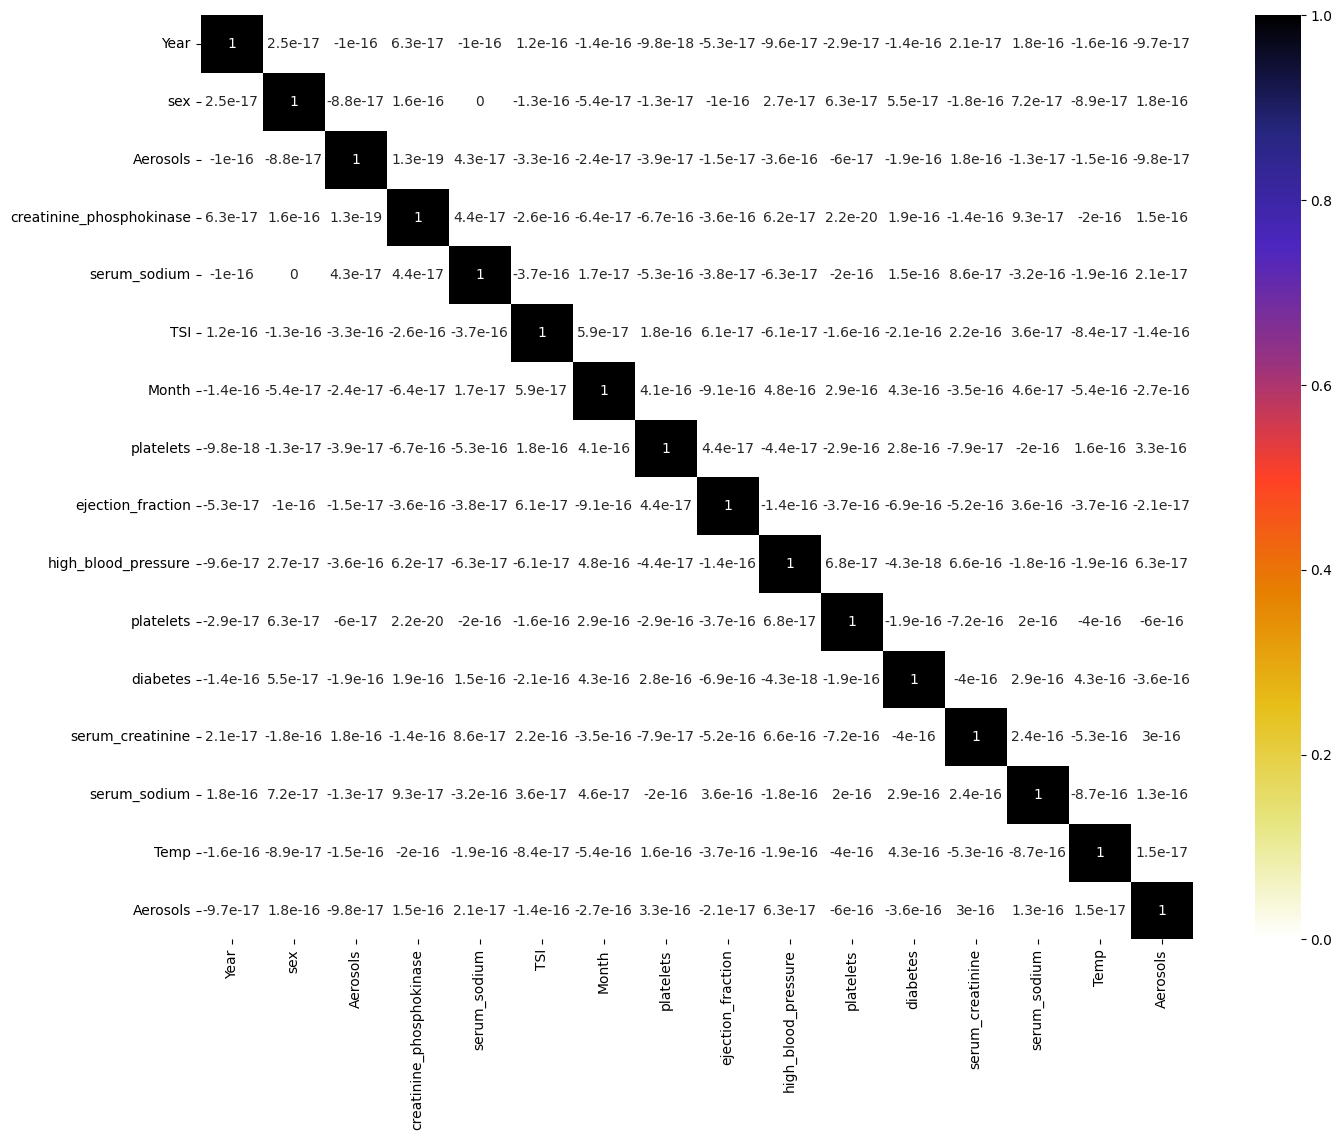

In [39]:
#***This part is wrong***

import seaborn as sns

plt.figure(figsize=(16,12))
cor = dataframe_after_pca.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()